In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds_bus_2016=pd.read_csv('RIDE_DATA_Jul2016.csv',low_memory=False)
ds_bus_2017=pd.read_csv('RIDE_DATA_jul_2017.csv',low_memory=False)

In [17]:
ds_bus_2016.head(30)

,Card_Number,Card_Type,Travel_Mode,Bus_Service_Number,Direction,Bus_Trip_Num,Bus_Reg_Num,Boarding_stop_stn,Alighting_stop_stn,Ride_start_date,Ride_start_time,Ride_end_date,Ride_end_time
0,98BC0900B02F1EDE40EACDFDA03BDADF84C79773,Student,Bus,858,1,4,1308,57111,46399,2016-07-31,17:00:56,2016-07-31,17:24:44
1,E877A026559C6E082D9ECA3C7DD7F09758453674,Adult,Bus,858,1,2,1305,46741,59619,2016-07-14,09:02:54,2016-07-14,09:25:47
2,219A75E2716D5A054F153D4743CDA3D9D985081B,Adult,Bus,161,0,1,3684,65069,67409,2016-07-08,06:29:24,2016-07-08,06:33:11
3,AA6EFB359A04E6C4B269A10094AA2FF93A530B45,Adult,Bus,161,0,5,3086,65069,67409,2016-07-31,12:25:47,2016-07-31,12:31:27
4,004D87F965675FDEB246A3B29E5E5D716D371AE7,Adult,Bus,858,1,4,8039,57111,46409,2016-07-24,20:01:50,2016-07-24,20:25:02
5,6F1F323822BA10A87CFE9D1E4DD16FD5C0D62BC8,Adult,Bus,67,0,3,1422,81049,41041,2016-07-21,11:23:18,2016-07-21,11:58:55
6,ABD3CA1655FD3370B0D3D12CECCB25E2F994698A,Adult,Bus,858,1,3,8030,95019,46399,2016-07-26,12:26:16,2016-07-26,13:37:13
7,6B6324A68F74A51658397E8BD6BE86DDD812A0CB,Adult,Bus,858,1,2,1379,57111,46409,2016-07-22,10:35:51,2016-07-22,10:57:09
8,EBDA80CB166257F1EF689F937BF2484035FC309A,Adult,Bus,67,0,1,206,81049,80029,2016-07-06,07:22:23,2016-07-06,07:29:13
9,E6E8553EC1CA688D6B65964DCCC161FCBD34DE18,Senior Citizen,Bus,858,1,5,3126,46741,59619,2016-07-25,20:18:59,2016-07-25,20:37:57


In [4]:
# Static information
print('Records Number: 2016->{}; 2017->{}'.format(ds_bus_2016.shape[0],ds_bus_2017.shape[0]))
# How many indentical users
print('Number of identical users: 2016->{}; 2017->{}'.format(ds_bus_2016['Card_Number'].drop_duplicates().shape[0],ds_bus_2017['Card_Number'].drop_duplicates().shape[0]))
# How many identical bus trips
bus_srvc_unique_2016=ds_bus_2016['Bus_Service_Number'].drop_duplicates()
bus_srvc_unique_2017=ds_bus_2017['Bus_Service_Number'].drop_duplicates()
print('Number of identical bus trips: 2016->{}; 2017->{}'.format(bus_srvc_unique_2016.shape[0],bus_srvc_unique_2017.shape[0]))


Records Number: 2016->4759999; 2017->4862907
Number of identical users: 2016->1093825; 2017->1093900
Number of identical bus trips: 2016->12; 2017->13


In [5]:
bus_srvc_unique_2016

0          858
2          161
5           67
107          7
290        922
458         38
5397        60
27183      60A
27743      979
37067     858A
342306     231
445595    979M
Name: Bus_Service_Number, dtype: object

In [6]:
bus_srvc_unique_2017
#67W is the only different bus service number

0          858
4          161
11          67
66           7
207        922
1185        38
7671        60
28783      60A
32455      979
49027     858A
102033     67W
334619     231
441180    979M
Name: Bus_Service_Number, dtype: object

In [7]:
# Distribution of the passengers' ages
idx_unique_2016=~ds_bus_2016['Card_Number'].duplicated()
idx_unique_2017=~ds_bus_2017['Card_Number'].duplicated()
print('Passenger card type dostribution:\n 2016->\n',ds_bus_2016[idx_unique_2016]['Card_Type'].value_counts(),'\n 2017->\n',ds_bus_2017[idx_unique_2017]['Card_Type'].value_counts())

Passenger card type dostribution:
 2016->
 Adult             857037
Senior Citizen    130857
Student            97580
Child               8351
Name: Card_Type, dtype: int64 
 2017->
 Adult             846524
Senior Citizen    143851
Student            94340
Child               9185
Name: Card_Type, dtype: int64


In [8]:
card_distr_2016=ds_bus_2016['Card_Number'].value_counts()
card_distr_2017=ds_bus_2017['Card_Number'].value_counts()
# There are some users have used too many times
card_distr_2016

19F8D1F1B66FC67EBB7C591CB506144C38446822    80724
DECB99A4423B4FD8705CA93C28DCE5E8B488EAC6      130
CC79274219715568D00BB02513F79B3C2834C916      129
C29F6D972D014A0CB4DC6762180F7460A9B47ADB      121
F90690C131F1ED000EF76A1907FB48E8074B43EC      118
C542173127EFA8DC8AE2B41515876CF5509B9F5E      115
CF020E860920702ECC4692A341055A3F08977069      112
AE7947DA35C998CA68670C1BC5E395186098EF36      110
D27BE36617EAB92604E98AE943CF3D7BA472F260      109
9DBE692A6E7336248A4AEC9E1EA9DD18BD0D5CD3      109
1782118C87A4F2FFE617DC596EC14044FD8D224A      108
4EC93DD1B08E2B3E087C4F25025D349D2DC3767A      107
755B6D65ADFA13C1F8436E166CCDD6E499D78E0B      105
A7B4DA0A567D2255EF9479E0F506533CDD019031      105
777586A978EF02A5CBCBF93D6EBE7BF01CCB7FDE      104
B3F8B928F3250F2C508B00B132FB88EAAF382349      103
4AB9C05315F73C416324CCC7A6B66CA6AC7683FB      103
B7F9995662EF75FAFF90CAE6DEA730BB150AE82C      101
0AE066548D416CE21F5E973636C449B02EC29D53      100
A90DC40FCF5524796AF16030F75CD2BDD60F6FE4      100


In [9]:
card_distr_2017

19F8D1F1B66FC67EBB7C591CB506144C38446822    75798
C97F346E9B2205F564CF7459788C6F8806E1948D      158
54BD4381A0FF91AD4D632BFB0324F87D5BF941F6      135
B10EF3307F76F88FD0BF2D53C62D22754D08C7BA      123
ACBC9FA6F412B7FE48BE9F75C4E12FADBF697DA4      116
23BEEC1581EFC626F8C33F461C8502BFF3D1C013      116
862583D3D2B13046A6FA626B93054F5703A3ABED      115
FD8BED4D06235CD5F4E255ECA74CA18BBA5F53EA      111
356DF3A05B83CF01CFDFB86D9547175E5460F783      109
D6986212A110E8DCB93D014D5248FA76584AC3CB      108
B189EBA2C476B8D9B44C1D6263DCCDE3F092A620      106
7D7FEB122BAB6BC755DF6D8BEF6C25584058774A      105
3A6CF9EF3BD6543099F9D4D1D2D600D8E8E309E8      103
B2254DBED441C02F773B0DFDA60E4D8339192274      102
7F64AFAE55CEF78E68A26F69729C8ACE8617C196      101
CC563468E16E1B38033C68503A31FEE29D0C4D94      101
465262FB3ACA48C8134C0C5E685C687E4A6EDAFA      101
543C653AD1E2DB2DC8586627E678A30EBE3D39DC      101
EC0E118CE0DEE031D463765F7883DD24079A980A      101
680188C7A4FC16CDE74B6F9830FDE6C354E90F10      101


Average card usage: 2016->4.351700683381711;2017->4.445476734619252


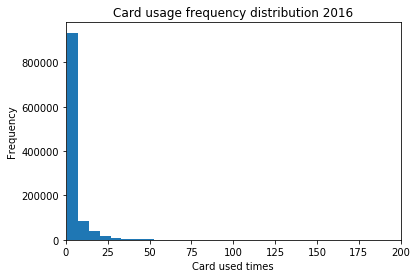

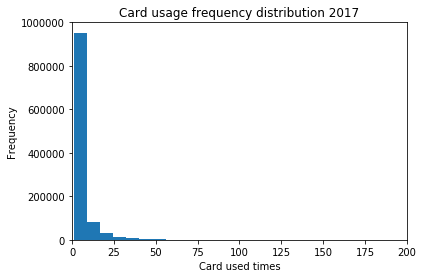

In [10]:
# Remove the improper card records with too frequently usage
print('Average card usage: 2016->{};2017->{}'.format(np.mean(card_distr_2016),np.mean(card_distr_2017)))
# Plot the dist graph, the first one will influence the effect of dist graph
plt.figure(1)
plt.hist(card_distr_2016[1:],bins=20)
plt.xlim(0,200)
plt.xlabel('Card used times')
plt.ylabel('Frequency')
plt.title('Card usage frequency distribution 2016')
plt.show()

plt.figure(2)
plt.hist(card_distr_2017[1:],bins=20)
plt.xlim(0,200)
plt.xlabel('Card used times')
plt.ylabel('Frequency')
plt.title('Card usage frequency distribution 2017')
plt.show()
# It proper to choose to users with card usage frequency less than 10

In [11]:
# What is bus trip number used for?
#print('Distribution of bus trip number for 2016\n',ds_bus_2016['Bus_Trip_Num'].value_counts())
# What if I remove the users less than 10 times?
idx_less_10_cardNum_2016=card_distr_2016.index[card_distr_2016<=10]
print(idx_less_10_cardNum_2016.shape[0],ds_bus_2016['Card_Number'].shape[0])
#test=set(idx_less_10_cardNum_2016)&set(ds_bus_2016['Card_Number'])
#test=pd.Series(list(test))
#test.shape[0]
#idx_less_10=ds_bus_2016['Card_Number'].isin(idx_less_10_cardNum_2016)

988050 4759999


In [14]:
len(ds_bus_2016['Boarding_stop_stn'].drop_duplicates())

501

In [16]:
import requests

headers = {
    'AccountKey': 'rmgDEFTiRRfcNeD8GbHqf8==',
    'UniqueUserID': '8ecabd56-08a2-e843-0a7a-9944dccf124a',
    'accept': 'application/json'
}


if __name__ == "__main__":
    results = []

    bus_stop_url = "http://datamall2.mytransport.sg/ltaodataservice/BusStops"

    while True:
        new_results = requests.get(
            bus_stop_url,
            headers=headers,
            params={'$skip': len(results)}
        ).json()['value']
        if new_results == []:
            break
        else:
            results += new_results


    print (len(results))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [12]:
# Data cleaning operations
# Use card number with less than 10 times use
#idx_less_10